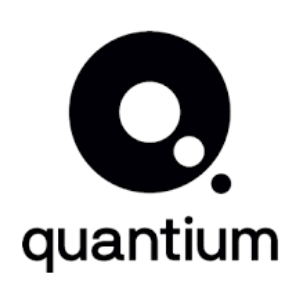
## Customer Value Segmentation for Chip Category Strategy

Following your initial data cleaning and EDA, Quantium's retail analytics team requires a deeper understanding of customer value segments. You will implement RFM (Recency, Frequency, Monetary) analysis on the chip category transaction data to identify high-value customer segments and develop targeted retention strategies. Your segmentation model will directly inform Julia's customer engagement initiatives and promotional planning for the next quarter.

**Business Context:** The supermarket has identified that customer retention costs 5x less than acquisition. Julia needs to know which customers are most valuable, which are at risk of churning, and how to allocate the limited marketing budget effectively. Your RFM analysis will enable personalized marketing campaigns and optimize resource allocation.


## 1. Setup and Data Import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PracticalData/Week3_HW/WoolliesChips.csv')

In [ ]:
df.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKAGE_SIZE,BRAND,PRICE_PER_UNIT,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,Natural Chip Co,3.00,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,Ccs,2.10,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths,1.45,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g,Smiths,3.00,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g,Kettle,4.60,MIDAGE SINGLES/COUPLES,Budget
5,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330g,Smiths,5.70,MIDAGE SINGLES/COUPLES,Budget
6,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,210g,Grain Waves,3.60,MIDAGE SINGLES/COUPLES,Budget
7,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150g,Doritos,3.90,MIDAGE SINGLES/COUPLES,Budget
8,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,210g,Grain Waves,3.60,MIDAGE SINGLES/COUPLES,Budget
9,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330g,Smiths,5.70,MIDAGE SINGLES/COUPLES,Budget


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248160 entries, 0 to 248159
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              248160 non-null  object 
 1   STORE_NBR         248160 non-null  int64  
 2   LYLTY_CARD_NBR    248160 non-null  int64  
 3   TXN_ID            248160 non-null  int64  
 4   PROD_NBR          248160 non-null  int64  
 5   PROD_NAME         248160 non-null  object 
 6   PROD_QTY          248160 non-null  int64  
 7   TOT_SALES         248160 non-null  float64
 8   PACKAGE_SIZE      248160 non-null  object 
 9   BRAND             248160 non-null  object 
 10  PRICE_PER_UNIT    248160 non-null  float64
 11  LIFESTAGE         248160 non-null  object 
 12  PREMIUM_CUSTOMER  248160 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 24.6+ MB


In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [ ]:
df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PRICE_PER_UNIT
count,248160,248160.000000,2.481600e+05,2.481600e+05,248160.000000,248160.000000,248160.000000,248160.000000
mean,2018-12-30 02:18:53.965183744,135.041284,1.355193e+05,1.351204e+05,56.405851,1.906246,7.305474,3.827164
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,1.320000
25%,2018-09-30 00:00:00,70.000000,7.001300e+04,6.755575e+04,27.000000,2.000000,5.800000,3.000000
50%,2018-12-30 00:00:00,130.000000,1.303625e+05,1.351645e+05,53.000000,2.000000,7.400000,3.800000
75%,2019-03-31 00:00:00,203.000000,2.030782e+05,2.026292e+05,87.000000,2.000000,8.800000,4.600000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,6.500000
std,NaN,76.779818,8.068646e+04,7.813893e+04,33.599860,0.342501,2.472495,1.076591


In [ ]:
print("Rows, cols:", df.shape)


Rows, cols: (248160, 13)


## 2. Data Exploration and Validation

1.   List item
2.   List item







Make sure to use your clean data from Homework 2

In [ ]:
# 2.1 Missing values by column
print(df.isna().sum())

# 2.2 Unique counts for key fields
for col in ['LYLTY_CARD_NBR','PROD_NAME','BRAND','STORE_NBR']:
    print(f"{col} → {df[col].nunique():,} unique")


NameError: name 'df' is not defined

In [ ]:
# 3.1 Summary stats
print(df[['PROD_QTY','TOT_SALES']].describe())

# 3.2 Count zeros or negatives
print("Zero/negative qty:", (df['PROD_QTY'] <= 0).sum())
print("Zero/negative sales:", (df['TOT_SALES'] <= 0).sum())

            PROD_QTY      TOT_SALES
count  248160.000000  248160.000000
mean        1.906246       7.305474
std         0.342501       2.472495
min         1.000000       1.700000
25%         2.000000       5.800000
50%         2.000000       7.400000
75%         2.000000       8.800000
max         5.000000      29.500000
Zero/negative qty: 0
Zero/negative sales: 0


#3. Product & Sales Analysis

---



## 3.1: Product Performance & Portfolio Optimization

In [ ]:
# 5.1 Top 10 brands by transaction count
brand_counts = df['BRAND'].value_counts().head(10)
print(brand_counts)

# 5.2 Top 10 brands by revenue
brand_sales = df.groupby('BRAND')['TOT_SALES'].sum().sort_values(ascending=False).head(10)
print(brand_sales)



BRAND
Kettle           41288
Smiths           31822
Doritos          25224
Pringles         25102
Red Rock Deli    17779
Thins            14075
Infuzions        12694
Woolworths       11836
Cobs              9693
Tostitos          9471
Name: count, dtype: int64
BRAND
Kettle           390239.8
Doritos          226329.9
Smiths           224654.2
Pringles         177655.5
Red Rock Deli     95046.0
Infuzions         92195.6
Thins             88852.5
Twisties          81522.1
Tostitos          79789.6
Cobs              70569.8
Name: TOT_SALES, dtype: float64


In [ ]:
# 1. (Re)build the base brand_stat
brand_stat = pd.DataFrame({
    'Count':  df['BRAND'].value_counts(),
    'Revenue': df.groupby('BRAND')['TOT_SALES'].sum(),
})
brand_stat['Count_pct']   = brand_stat['Count']   / brand_stat['Count'].sum()
brand_stat['Revenue_pct'] = brand_stat['Revenue'] / brand_stat['Revenue'].sum()

# 2. Calculate how many distinct products each brand offers
brand_stat['Unique_Products'] = df.groupby('BRAND')['PROD_NAME'].nunique()

# 3. (Optional) Rename for clarity
brand_stat.rename(columns={
    'Count': 'Num_Transactions',
    'Unique_Products': 'Num_Unique_SKUs'
}, inplace=True)

# 4. View the result
display(brand_stat.sort_values('Revenue', ascending=False))


,Num_Transactions,Revenue,Count_pct,Revenue_pct,Num_Unique_SKUs
BRAND,,,,,
Kettle,41288,390239.8,0.166377,0.215254,13
Doritos,25224,226329.9,0.101644,0.124842,8
Smiths,31822,224654.2,0.128232,0.123918,18
Pringles,25102,177655.5,0.101152,0.097994,8
Red Rock Deli,17779,95046.0,0.071643,0.052427,12
Infuzions,12694,92195.6,0.051152,0.050855,4
Thins,14075,88852.5,0.056717,0.049011,5
Twisties,9454,81522.1,0.038096,0.044967,3
Tostitos,9471,79789.6,0.038165,0.044011,3


In [ ]:
brand_stat['Avg_Basket_Value']     = brand_stat['Revenue']              / brand_stat['Num_Transactions']
brand_stat['Revenue_per_SKU']      = brand_stat['Revenue']              / brand_stat['Num_Unique_SKUs']
brand_stat['Transactions_per_SKU'] = brand_stat['Num_Transactions']     / brand_stat['Num_Unique_SKUs']

# 3. Normalize each metric to [0,1]
metrics_to_norm = [
    'Revenue_pct',
    'Count_pct',
    'Avg_Basket_Value',
    'Revenue_per_SKU',
    'Transactions_per_SKU'
]
for col in metrics_to_norm:
    min_val = brand_stat[col].min()
    max_val = brand_stat[col].max()
    if max_val > min_val:
        brand_stat[f'{col}_norm'] = (brand_stat[col] - min_val) / (max_val - min_val)
    else:
        brand_stat[f'{col}_norm'] = 0.0

# 4. Define weights and compute the composite Performance_metric
weights = {
    'Revenue_pct_norm':           0.30,
    'Count_pct_norm':             0.20,
    'Avg_Basket_Value_norm':      0.20,
    'Revenue_per_SKU_norm':       0.20,
    'Transactions_per_SKU_norm':  0.10
}
brand_stat['Performance_metric'] = sum(brand_stat[col] * w for col, w in weights.items())

# 5. Sort and inspect
brand_stat = brand_stat.sort_values('Performance_metric', ascending=False)
display(brand_stat[['Num_Transactions','Revenue','Num_Unique_SKUs',
                  'Avg_Basket_Value','Revenue_per_SKU','Transactions_per_SKU',
                  'Performance_metric']])

,Num_Transactions,Revenue,Num_Unique_SKUs,Avg_Basket_Value,Revenue_per_SKU,Transactions_per_SKU,Performance_metric
BRAND,,,,,,,
Kettle,41288,390239.8,13,9.451652,30018.446154,3176.000000,0.996966
Doritos,25224,226329.9,8,8.972800,28291.237500,3153.000000,0.757784
Pringles,25102,177655.5,8,7.077344,22206.937500,3137.750000,0.609117
Twisties,9454,81522.1,3,8.623027,27174.033333,3151.333333,0.545186
Tostitos,9471,79789.6,3,8.424623,26596.533333,3157.000000,0.533277
Smiths,31822,224654.2,18,7.059713,12480.788889,1767.888889,0.526225
Infuzions,12694,92195.6,4,7.262927,23048.900000,3173.500000,0.494619
Tyrrells,6442,51647.4,2,8.017293,25823.700000,3221.000000,0.480388
Cobs,9693,70569.8,3,7.280491,23523.266667,3231.000000,0.470146


In [ ]:
### Drill down to SKU level
import pandas as pd

# 1. Define your list of “important” brands
important_brands = ['Kettle','Doritos','Pringles', 'Smiths']

# 2. Empty dict to hold per-brand SKU tables
sku_breakdowns = {}

for brand in important_brands:
    # 2a. Filter transactions to this brand
    df_brand = df[df['BRAND']==brand]

    # 2b. Aggregate at SKU (PROD_NAME) level
    sku_stats = df_brand.groupby('PROD_NAME').agg(
        Num_Transactions = ('TXN_ID','count'),
        Unique_Customers  = ('LYLTY_CARD_NBR','nunique'),
        Revenue           = ('TOT_SALES','sum')
    )

    # 2c. Derive additional metrics
    total_rev_brand = sku_stats['Revenue'].sum()
    total_txn_brand = sku_stats['Num_Transactions'].sum()

    sku_stats['Revenue_pct_of_Brand']   = sku_stats['Revenue'] / total_rev_brand * 100
    sku_stats['Transactions_pct_of_Brand'] = sku_stats['Num_Transactions'] / total_txn_brand * 100
    sku_stats['Avg_Basket_Value']       = sku_stats['Revenue'] / sku_stats['Num_Transactions']

    # 2d. Sort descending by Revenue
    sku_stats = sku_stats.sort_values('Revenue', ascending=False)

    # 2e. Keep only top 10 SKUs by revenue for clarity
    sku_breakdowns[brand] = sku_stats.head(10)

# 3. Display each table
for brand, table in sku_breakdowns.items():
    print(f"\nTop SKUs for {brand}:\n")
    display(table)



Top SKUs for Kettle:



,Num_Transactions,Unique_Customers,Revenue,Revenue_pct_of_Brand,Transactions_pct_of_Brand,Avg_Basket_Value
PROD_NAME,,,,,,
Kettle Mozzarella Basil & Pesto 175g,3304,3215,34457.4,8.829802,8.002325,10.428995
Kettle Sweet Chilli And Sour Cream 175g,3200,3103,33031.8,8.464488,7.750436,10.322438
Kettle Original 175g,3159,3081,32740.2,8.389764,7.651134,10.364103
Kettle Sea Salt And Vinegar 175g,3173,3084,32589.0,8.351019,7.685042,10.270722
Kettle Honey Soy Chicken 175g,3148,3081,32578.2,8.348252,7.624491,10.348856
Kettle Chilli 175g,3038,2957,31271.4,8.013380,7.358070,10.293417
Kettle Tortilla ChpsHny&Jlpno Chili 150g,3296,3213,29021.4,7.436812,7.982949,8.805036
Kettle Sensations Camembert & Fig 150g,3219,3138,28308.4,7.254104,7.796454,8.794160
Kettle Tortilla ChpsBtroot&Ricotta 150g,3146,3068,27770.2,7.116189,7.619647,8.827146



Top SKUs for Doritos:



,Num_Transactions,Unique_Customers,Revenue,Revenue_pct_of_Brand,Transactions_pct_of_Brand,Avg_Basket_Value
PROD_NAME,,,,,,
Dorito Corn Chp Supreme 380g,3183,3111,39052.0,17.254459,12.618934,12.268929
Doritos Cheese Supreme 330g,3052,2991,33390.6,14.753066,12.099588,10.940564
Doritos Corn Chips Cheese Supreme 170g,3217,3134,27183.2,12.010433,12.753727,8.449860
Doritos Corn Chips Nacho Cheese 170g,3160,3082,26562.8,11.736319,12.527751,8.405949
Doritos Mexicana 170g,3115,3044,26290.0,11.615787,12.349350,8.439807
Doritos Corn Chips Original 170g,3121,3049,26228.4,11.588570,12.373137,8.403845
Doritos Corn Chip Mexican Jalapeno 150g,3204,3102,23887.5,10.554284,12.702188,7.455524
Doritos Corn Chip Southern Chicken 150g,3172,3095,23735.4,10.487081,12.575325,7.482787



Top SKUs for Pringles:



,Num_Transactions,Unique_Customers,Revenue,Revenue_pct_of_Brand,Transactions_pct_of_Brand,Avg_Basket_Value
PROD_NAME,,,,,,
Pringles Barbeque 134g,3210,3126,22614.4,12.729355,12.787826,7.044984
Pringles Sweet&Spcy BBQ 134g,3177,3091,22477.5,12.652296,12.656362,7.075071
Pringles SourCream Onion 134g,3162,3076,22410.9,12.614808,12.596606,7.087571
Pringles Original Crisps 134g,3157,3093,22355.4,12.583568,12.576687,7.081216
Pringles Chicken Salt Crips 134g,3104,3035,22063.1,12.419036,12.365549,7.107957
Pringles Slt Vingar 134g,3095,3030,21963.2,12.362803,12.329695,7.096349
Pringles Mystery Flavour 134g,3114,3028,21937.3,12.348225,12.405386,7.044733
Pringles Sthrn FriedChicken 134g,3083,3000,21833.7,12.289909,12.281890,7.081966



Top SKUs for Smiths:



,Num_Transactions,Unique_Customers,Revenue,Revenue_pct_of_Brand,Transactions_pct_of_Brand,Avg_Basket_Value
PROD_NAME,,,,,,
Smiths Crnkle Chip Orgnl Big Bag 380g,3233,3149,36367.6,16.188257,10.159638,11.248871
Smiths Crinkle Chips Salt & Vinegar 330g,3197,3106,34804.2,15.492343,10.046509,10.886519
Smiths Crinkle Original 330g,3142,3064,34302.6,15.269067,9.873672,10.917441
Smiths Chip Thinly Cut Original 175g,1614,1577,9135.0,4.066249,5.071963,5.659851
Smiths Thinly Cut Roast Chicken 175g,1518,1484,8592.0,3.824545,4.770285,5.660079
Smiths Thinly Swt Chli&S/Cream175G,1461,1433,8325.0,3.705695,4.591163,5.698152
Smiths Chip Thinly S/Cream&Onion 175g,1473,1445,8313.0,3.700354,4.628873,5.643585
Smiths Chip Thinly CutSalt/Vinegr175g,1440,1404,8196.0,3.648274,4.525171,5.691667
Smiths Crinkle Cut Chips Chicken 170g,1484,1447,8183.8,3.642843,4.663440,5.514690


In [ ]:
#top 10 SKUs and bottom
product_perf = df.groupby('PROD_NAME').agg(
    Total_Sales = ('TOT_SALES','sum'),
    Num_Transactions = ('TXN_ID','count'),
    Unique_Customers = ('LYLTY_CARD_NBR','nunique'),
    Unit_solds = ('PROD_QTY','sum')
).sort_values('Total_Sales', ascending=False)

product_perf.reset_index(inplace=True)
product_perf.head(10)

,PROD_NAME,Total_Sales,Num_Transactions,Unique_Customers,Unit_solds
0,Dorito Corn Chp Supreme 380g,39052.0,3183,3111,6109
1,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6,3233,3149,6164
2,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2,3197,3106,6106
3,Kettle Mozzarella Basil & Pesto 175g,34457.4,3304,3215,6381
4,Smiths Crinkle Original 330g,34302.6,3142,3064,6018
5,Cheezels Cheese 330g,34296.9,3149,3061,6017
6,Doritos Cheese Supreme 330g,33390.6,3052,2991,5858
7,Kettle Sweet Chilli And Sour Cream 175g,33031.8,3200,3103,6120
8,Kettle Original 175g,32740.2,3159,3081,6064
9,Kettle Sea Salt And Vinegar 175g,32589.0,3173,3084,6035


In [ ]:
product_perf['Cumulative_Sales'] = product_perf['Total_Sales'].cumsum()
product_perf['Cumulative_Sales_pct'] = product_perf['Cumulative_Sales'] / product_perf['Total_Sales'].sum()

product_perf

,PROD_NAME,Total_Sales,Num_Transactions,Unique_Customers,Unit_solds,Cumulative_Sales,Cumulative_Sales_pct
0,Dorito Corn Chp Supreme 380g,39052.0,3183,3111,6109,39052.0,0.021541
1,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6,3233,3149,6164,75419.6,0.041601
2,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2,3197,3106,6106,110223.8,0.060799
3,Kettle Mozzarella Basil & Pesto 175g,34457.4,3304,3215,6381,144681.2,0.079805
4,Smiths Crinkle Original 330g,34302.6,3142,3064,6018,178983.8,0.098726
...,...,...,...,...,...,...,...
101,Woolworths Cheese Rings 190g,5169.6,1516,1482,2872,1794015.6,0.989569
102,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,5076.2,1576,1546,2986,1799091.8,0.992369
103,WW Crinkle Cut Chicken 175g,4702.2,1467,1432,2766,1803794.0,0.994963
104,Sunbites Whlegrn Crisps Frch/Onin 90g,4600.2,1432,1397,2706,1808394.2,0.997500


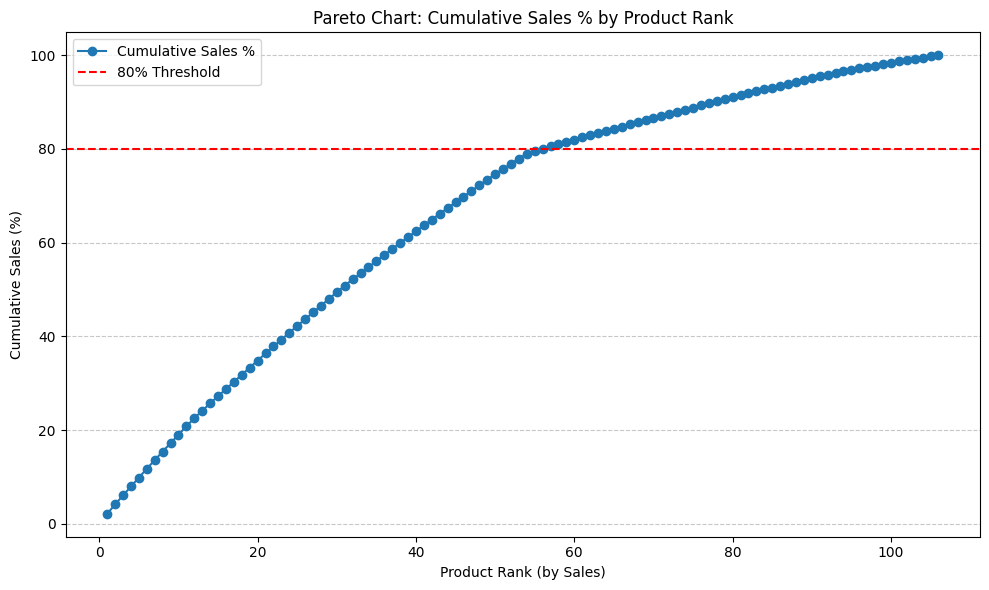

In [ ]:
import matplotlib.pyplot as plt

# 1. Ensure product_perf is sorted by Total_Sales descending
product_perf = product_perf.sort_values('Total_Sales', ascending=False).reset_index(drop=True)

# 2. Add a rank column
product_perf['Rank'] = product_perf.index + 1

# 3. Plot Pareto: Rank on x, cumulative sales % on y
plt.figure(figsize=(10, 6))
plt.plot(
    product_perf['Rank'],
    product_perf['Cumulative_Sales_pct'] * 100,  # if stored as fraction; omit *100 if already percent
    marker='o',
    linestyle='-',
    label='Cumulative Sales %'
)
plt.axhline(80, color='red', linestyle='--', label='80% Threshold')
plt.title('Pareto Chart: Cumulative Sales % by Product Rank')
plt.xlabel('Product Rank (by Sales)')
plt.ylabel('Cumulative Sales (%)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
#Create the flavor column
# 1. Define a regex that captures:
#    - Brand: everything up to the flavor
#    - Flavor: the text between the brand and the weight
#    - Weight: the trailing “NNNg”
pattern = r'^(?P<Brand>.+?)\s+(?P<Flavor>.+?)\s+(?P<Weight>\d+g)$'

# 2. Extract Brand, Flavor, and Weight into separate columns
extracted = df['PROD_NAME'].str.extract(pattern, expand=True)

# 3. Create the Flavor column
df['Flavor'] = extracted['Flavor'].str.strip()

# 4. (Optional) Check the first few flavors
print(df[['PROD_NAME','Flavor']].head(20))

                                   PROD_NAME                        Flavor
0            Natural Chip Compny SeaSalt175g                           NaN
1                      CCs Nacho Cheese 175g                  Nacho Cheese
2      Smiths Crinkle Cut Chips Chicken 170g     Crinkle Cut Chips Chicken
3      Smiths Chip Thinly S/Cream&Onion 175g     Chip Thinly S/Cream&Onion
4   Kettle Tortilla ChpsHny&Jlpno Chili 150g  Tortilla ChpsHny&Jlpno Chili
5   Smiths Crinkle Chips Salt & Vinegar 330g  Crinkle Chips Salt & Vinegar
6              Grain Waves Sweet Chilli 210g            Waves Sweet Chilli
7    Doritos Corn Chip Mexican Jalapeno 150g    Corn Chip Mexican Jalapeno
8         Grain Waves Sour Cream&Chives 210G                           NaN
9   Smiths Crinkle Chips Salt & Vinegar 330g  Crinkle Chips Salt & Vinegar
10       Kettle Sensations Siracha Lime 150g       Sensations Siracha Lime
11                      Twisties Cheese 270g                        Cheese
12               WW Crink

In [ ]:
#top 10 popular flavor
popular_flavors = df['Flavor'].value_counts().head(10)
display(popular_flavors)

,count
Flavor,
Cheese,6264
Original,4673
Honey Soy Chicken,4661
Mozzarella Basil & Pesto,3304
Tortilla ChpsHny&Jlpno Chili,3296
Popd Swt/Chlli &Sr/Cream Chips,3269
Crisps Ched & Chives,3268
Popd Sea Salt Chips,3265
Splash Of Lime,3252


In [ ]:
#compare the size
Size_Analysis = df.groupby('PACKAGE_SIZE')['PROD_QTY'].sum()
print(Size_Analysis)

PACKAGE_SIZE
110g     42835
125g      2730
134g     48019
135g      6212
150g     82174
160g      5604
165g     29051
170g     38088
175g    126465
180g      2764
190g      5673
200g      8425
210g     11962
220g      2970
250g      6069
270g     12049
330g     23999
380g     12273
90g       5692
Name: PROD_QTY, dtype: int64


In [ ]:
# 1. Turn the Series into a DataFrame
size_df = Size_Analysis.reset_index()
size_df.columns = ['PACKAGE_SIZE', 'Units_Sold']

# 2. Extract numeric grams
size_df['Grams'] = size_df['PACKAGE_SIZE'].str.rstrip('gG').astype(int)

# 3. Define four size buckets
bins   = [0,   100, 150, 250, size_df['Grams'].max() + 1]
labels = ['≤100g', '101–150g', '151–250g', '>250g']

# 4. Assign each row to a bucket
size_df['Size_Group'] = pd.cut(
    size_df['Grams'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)

# 5. Aggregate units sold by size group
size_grouped = size_df.groupby('Size_Group')['Units_Sold'].sum()

display(size_grouped)

/tmp/ipython-input-204-2004452120.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_grouped = size_df.groupby('Size_Group')['Units_Sold'].sum()


,Units_Sold
Size_Group,
≤100g,5692
101–150g,99796
151–250g,313176
>250g,54390


In [ ]:
#How many product offer at <100g
# 1. Convert PACKAGE_SIZE to numeric grams
df['Size_g'] = df['PACKAGE_SIZE'].str.rstrip('gG').astype(int)

# 2. Filter for sizes less than 100 g
small_df = df[df['Size_g'] < 100]

# 3. Count how many distinct products in that bucket
num_small_products = small_df['PROD_NAME'].nunique()

print(f"Number of distinct SKUs offered at <100 g: {num_small_products}")


Number of distinct SKUs offered at <100 g: 2


## 3.2 Sales Performance Over Time


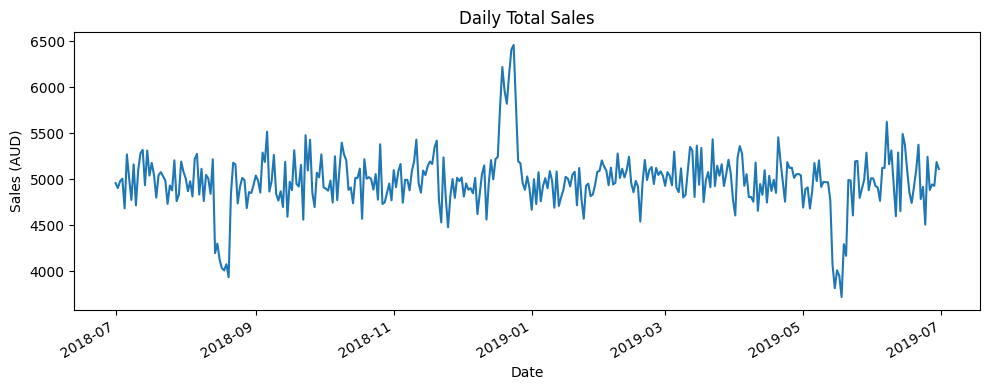

In [ ]:
# Aggregate total daily sales
daily_sales = df.groupby('DATE')['TOT_SALES'].sum()

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
daily_sales.plot()
plt.title("Daily Total Sales")
plt.xlabel("Date")
plt.ylabel("Sales (AUD)")
plt.tight_layout()
plt.show()


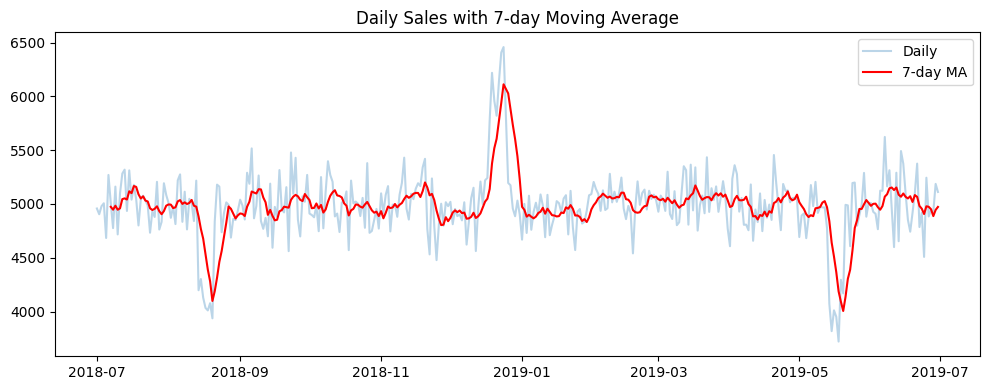

In [ ]:
daily_sales_7d = daily_sales.rolling(window=7).mean()
plt.figure(figsize=(10,4))
plt.plot(daily_sales.index, daily_sales, alpha=0.3, label='Daily')
plt.plot(daily_sales_7d.index, daily_sales_7d, label='7-day MA', color='red')
plt.legend()
plt.title("Daily Sales with 7-day Moving Average")
plt.tight_layout()
plt.show()


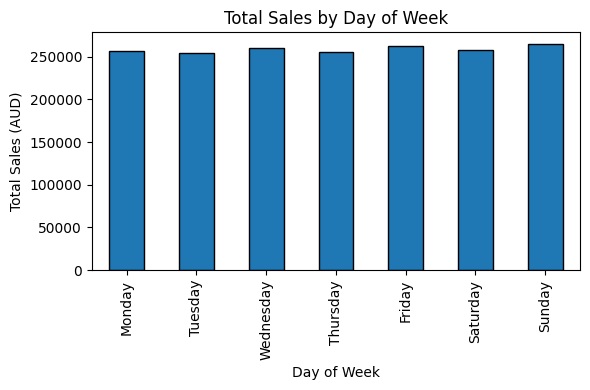

In [ ]:
# Tag each transaction with its weekday name
df['DOW'] = df['DATE'].dt.day_name()

# Compute average sales per weekday
dow_sales = df.groupby('DOW')['TOT_SALES'].sum()
# Re-order days Monday→Sunday
dow_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
dow_sales = dow_sales.reindex(dow_order)

# Plot
plt.figure(figsize=(6,4))
dow_sales.plot(kind='bar', edgecolor='black')
plt.title("Total Sales by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Sales (AUD)")
plt.tight_layout()
plt.show()


In [ ]:
display(dow_sales)


,TOT_SALES
DOW,
Monday,256973.15
Tuesday,254065.60
Wednesday,260535.90
Thursday,255466.75
Friday,262885.50
Saturday,257937.50
Sunday,265062.00


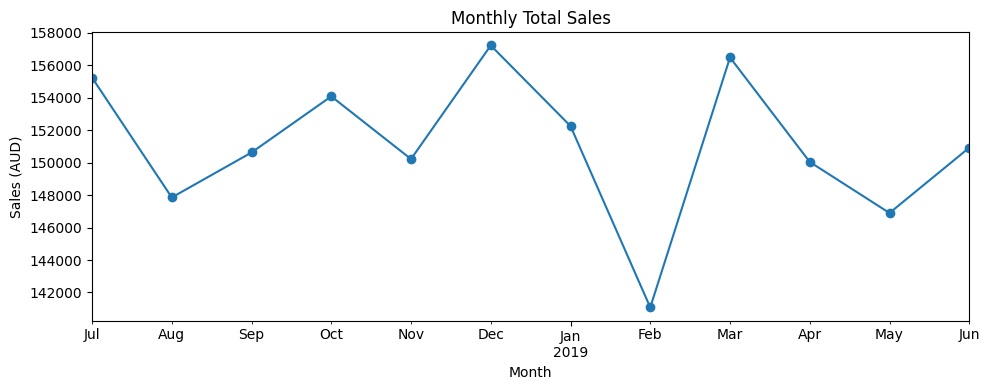

In [ ]:
# Create year–month period
df['Year_Month'] = df['DATE'].dt.to_period('M')

# Sum by month
monthly_sales = df.groupby('Year_Month')['TOT_SALES'].sum()

# Plot
plt.figure(figsize=(10,4))
monthly_sales.plot(marker='o')
plt.title("Monthly Total Sales")
plt.xlabel("Month")
plt.ylabel("Sales (AUD)")
plt.tight_layout()
plt.show()


# 3. RFM Metrics Calculation


### 3.1 Calculate Base RFM Values

In [ ]:
##Create a most recent purchase date column
df['most_recent_purchase'] = df.groupby('LYLTY_CARD_NBR')['DATE'].transform('max')
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKAGE_SIZE,BRAND,PRICE_PER_UNIT,LIFESTAGE,PREMIUM_CUSTOMER,Flavor,Size_g,DOW,Year_Month,most_recent_purchase
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,Natural Chip Co,3.00,YOUNG SINGLES/COUPLES,Premium,NaN,175,Wednesday,2018-10,2018-10-17
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,Ccs,2.10,MIDAGE SINGLES/COUPLES,Budget,Nacho Cheese,175,Tuesday,2019-05,2019-05-14
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths,1.45,MIDAGE SINGLES/COUPLES,Budget,Crinkle Cut Chips Chicken,170,Monday,2019-05,2019-05-20
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g,Smiths,3.00,MIDAGE SINGLES/COUPLES,Budget,Chip Thinly S/Cream&Onion,175,Friday,2018-08,2018-08-17
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g,Kettle,4.60,MIDAGE SINGLES/COUPLES,Budget,Tortilla ChpsHny&Jlpno Chili,150,Saturday,2018-08,2018-08-18


### 3.2. RFM Value Distribution Analysis

*   Visualize distribution of R, F, and M values
*   Identify outliers and handle appropriately
*   Check for any calculation anomalies

In [ ]:
# 1. Ensure DATE is datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# 2. Define a “snapshot” date for recency (one day after most_recent_purchase_date)
snapshot_date = df['DATE'].max() + pd.Timedelta(days=1)
print(snapshot_date)

2019-07-01 00:00:00


In [ ]:
def calc_recency(dates):
  last_purchase = dates.max()
  delta = (snapshot_date - last_purchase).days
  return delta

In [ ]:
# 3. Group by customer (loyalty card number) and compute R, F, M:
rfm = df.groupby('LYLTY_CARD_NBR').agg({
    'DATE':  calc_recency,
    'TXN_ID': 'count',                                # Frequency: number of transactions
    'TOT_SALES': 'sum'                                   # Monetary: total spend
})

# 4. Rename the columns for clarity
rfm.rename(columns={
    'DATE': 'Recency',
    'TXN_ID': 'Frequency',
    'TOT_SALES': 'Monetary'
}, inplace=True)

# 5. Inspect the RFM table
rfm.sample(10)

,Recency,Frequency,Monetary
LYLTY_CARD_NBR,,,
149378,78,7,59.4
266358,214,2,7.1
150103,285,1,13.0
153298,52,7,69.2
51092,145,1,5.4
245046,225,2,16.6
205422,236,1,3.8
75072,45,2,12.8
94205,184,3,13.6


### 3.3. Customer Segmentation



### 3.3.1 RFM Scoring Implementation

 Create Quartile-Based Scores
* Calculate quartiles for each RFM dimension
* Assign scores 1-4 (4 being best)
* Create R_score, F_score, M_score columns


In [ ]:
#1: Assign the RFM score
r_labels = [4,3,2,1]
f_labels = [1,2,3,4]
m_labels = [1,2,3,4]

In [ ]:
#2: Score Recency
rfm['R_score'] = pd.qcut(
    rfm['Recency'],
    q=4,
    labels=r_labels).astype(int)

In [ ]:
display(rfm['Frequency'].value_counts().sort_index())

,count
Frequency,
1,19542
2,13347
3,9501
4,7723
5,6534
6,5283
7,3816
8,2452
9,1530


In [ ]:
#3: Score Frequency
# Define custom bins and labels based on frequency distribution
bins = [0, 1, 3, 6, rfm['Frequency'].max()] # Define custom bins
f_labels = [1, 2, 3, 4]                     # Assign labels 1-4

# Use pd.cut with custom bins and labels
rfm['F_score'] = pd.cut(
    rfm['Frequency'],
    bins=bins,
    labels=f_labels,
    include_lowest=True # Include the lowest value in the first bin
).astype(int)

In [ ]:
# 4. Score Monetary
rfm['M_score'] = pd.qcut(
    rfm['Monetary'],   # the “total spend” column
    q=4,               # again, quartiles
    labels=m_labels   # highest spend → M_score = 4
).astype(int)


### 3.3.2 Calculate Combined RFM Score
* Implement formula: RFM_Score = R × 100 + F × 10 + M
* Validate score ranges (111 to 444)
* Add RFM_score column to dataset


In [ ]:
# 1. Calculate the combined score: R ×100 + F ×10 + M
rfm['RFM_Score'] = (
    rfm['R_score'] * 100 +
    rfm['F_score'] * 10 +
    rfm['M_score']
)

# 2. Validate that scores fall between 111 and 444
min_score, max_score = rfm['RFM_Score'].min(), rfm['RFM_Score'].max()
print(f"RFM score range: {min_score} to {max_score}")

# (Optional) Raise an error if outside expected bounds
if not (111 <= min_score <= max_score <= 444):
    raise ValueError("Unexpected RFM_Score bounds!")

# 3. Inspect a few examples
rfm.sample(10)


RFM score range: 111 to 444


,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
LYLTY_CARD_NBR,,,,,,,
128128,6,4,27.0,4,3,3,433
39196,1,7,56.6,4,4,4,444
130062,31,10,90.8,4,4,4,444
215148,269,1,7.4,1,1,1,111
59280,81,4,36.4,2,3,3,233
171331,56,1,9.2,3,1,2,312
197047,211,1,4.2,1,1,1,111
222058,124,5,36.2,2,3,3,233
124269,265,2,6.0,1,2,1,121


In [ ]:
def assign_rfm_segment(row):
    R, F, M = row['R_score'], row['F_score'], row['M_score']
    # 1. Champions
    if (R, F, M) == (4,4,4):
        return 'Champions'
    # 2. Loyal Customers
    if R >= 3 and F >= 3 and M >= 3:
        return 'Loyal Customers'
    # 3. Big Spenders
    if R <= 2 and F >= 3 and M >= 3:
        return 'Big Spenders'
    # 4. At Risk
    if R <= 2 and F <= 2 and M >= 3:
        return 'At Risk'
    # 5. Lost
    if R <= 2 and F <= 2 and M <= 2:
        return 'Hibernating'
    # 6. New Customers
    if (R, F, M) == (4,1,1):
        return 'New Customers'
    # 7. Potential Loyalists
    if R >= 3 and F <= 2 and M <= 2:
        return 'Potential Loyalists'
    # 8. Everyone else
    return 'Others'



# 4. Segment Performance Analysis

In [ ]:
rfm['Segment'] = rfm.apply(assign_rfm_segment, axis=1)
print(rfm['Segment'].value_counts())

Segment
Hibernating            24645
Loyal Customers        16307
Potential Loyalists     9393
Big Spenders            7439
Champions               4828
Others                  3958
At Risk                 3426
New Customers           1397
Name: count, dtype: int64


In [ ]:
# 1. Aggregate key metrics by segment
segment_perf = rfm.groupby('Segment').agg(
    Count              = ('Recency',    'size'),
    Avg_Recency        = ('Recency',    'mean'),
    Avg_Frequency      = ('Frequency',  'mean'),
    Avg_Monetary       = ('Monetary',   'mean'),
    Total_Monetary     = ('Monetary',   'sum'),
).sort_values('Total_Monetary', ascending=False)
display(segment_perf)

,Count,Avg_Recency,Avg_Frequency,Avg_Monetary,Total_Monetary
Segment,,,,,
Loyal Customers,16307,36.848654,5.617097,42.036693,685492.35
Big Spenders,7439,126.202581,5.296814,40.138486,298590.20
Champions,4828,14.489851,8.425228,60.971758,294371.65
Hibernating,24645,202.247271,1.440170,9.366772,230844.10
Potential Loyalists,9393,41.827318,1.871500,11.960923,112348.95
Others,3958,39.816069,3.057605,24.516751,97037.30
At Risk,3426,153.734968,2.892878,25.243068,86482.75
New Customers,1397,15.468862,1.000000,5.554116,7759.10


### 4.1 Segment Performance


In [ ]:
segment_stat = (rfm.groupby('Segment').agg(
    Num_Customers              = ('Monetary',    'count'),
    Total_Spending              = ('Monetary',    'sum'),
    Average_spending              = ('Monetary',    'mean'),
    Frequency        = ('Frequency',  'mean'),
    Recency          = ('Recency',     'mean')
).sort_values('Total_Spending', ascending=False))

display(segment_stat)

,Num_Customers,Total_Spending,Average_spending,Frequency,Recency
Segment,,,,,
Loyal Customers,16307,685492.35,42.036693,5.617097,36.848654
Big Spenders,7439,298590.20,40.138486,5.296814,126.202581
Champions,4828,294371.65,60.971758,8.425228,14.489851
Hibernating,24645,230844.10,9.366772,1.440170,202.247271
Potential Loyalists,9393,112348.95,11.960923,1.871500,41.827318
Others,3958,97037.30,24.516751,3.057605,39.816069
At Risk,3426,86482.75,25.243068,2.892878,153.734968
New Customers,1397,7759.10,5.554116,1.000000,15.468862


In [ ]:
segment_stat['Rev_Contribution'] = segment_stat['Total_Spending'] / segment_stat['Total_Spending'].sum()
segment_stat['Cust_Contribution'] = segment_stat['Num_Customers'] / segment_stat['Num_Customers'].sum()
segment_stat['Performance_metrics'] = segment_stat['Rev_Contribution'] / segment_stat['Cust_Contribution']
segment_stat.sort_values('Performance_metrics', ascending=False)

,Num_Customers,Total_Spending,Average_spending,Frequency,Recency,Rev_Contribution,Cust_Contribution,Performance_metrics
Segment,,,,,,,,
Champions,4828,294371.65,60.971758,8.425228,14.489851,0.162374,0.067626,2.401066
Loyal Customers,16307,685492.35,42.036693,5.617097,36.848654,0.378114,0.228412,1.655404
Big Spenders,7439,298590.20,40.138486,5.296814,126.202581,0.164701,0.104198,1.580653
At Risk,3426,86482.75,25.243068,2.892878,153.734968,0.047703,0.047988,0.994071
Others,3958,97037.30,24.516751,3.057605,39.816069,0.053525,0.055440,0.965469
Potential Loyalists,9393,112348.95,11.960923,1.871500,41.827318,0.061971,0.131568,0.471021
Hibernating,24645,230844.10,9.366772,1.440170,202.247271,0.127332,0.345202,0.368863
New Customers,1397,7759.10,5.554116,1.000000,15.468862,0.004280,0.019568,0.218721


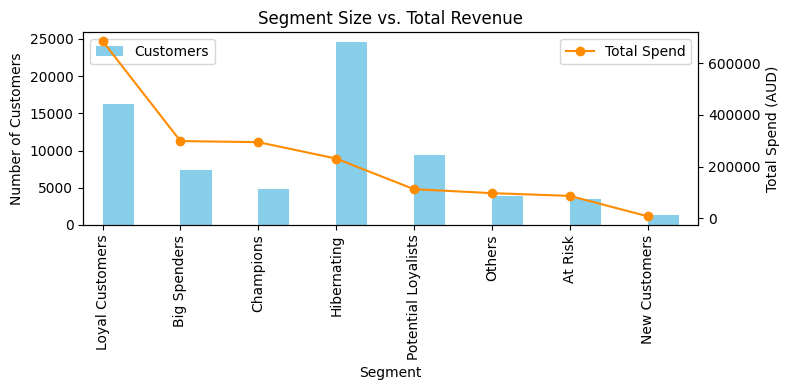

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8,4))

# Bar: segment count
segment_perf['Count'].plot(
    kind='bar', ax=ax1, color='skyblue',
    label='Customers', position=0, width=0.4
)
ax1.set_ylabel('Number of Customers')
ax1.legend(loc='upper left')

# Line: total monetary
ax2 = ax1.twinx()
segment_perf['Total_Monetary'].plot(
    kind='line', marker='o', ax=ax2, color='darkorange',
    label='Total Spend'
)
ax2.set_ylabel('Total Spend (AUD)')
ax2.legend(loc='upper right')

plt.title('Segment Size vs. Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# ---. Merge segment back into df ---
df = df.merge(rfm[['Segment']], left_on='LYLTY_CARD_NBR', right_index=True, how='left')
df.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACKAGE_SIZE,BRAND,PRICE_PER_UNIT,LIFESTAGE,PREMIUM_CUSTOMER,Flavor,Size_g,DOW,Year_Month,most_recent_purchase,Segment
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,Natural Chip Co,3.00,YOUNG SINGLES/COUPLES,Premium,NaN,175,Wednesday,2018-10,2018-10-17,Hibernating
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,Ccs,2.10,MIDAGE SINGLES/COUPLES,Budget,Nacho Cheese,175,Tuesday,2019-05,2019-05-14,Potential Loyalists
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths,1.45,MIDAGE SINGLES/COUPLES,Budget,Crinkle Cut Chips Chicken,170,Monday,2019-05,2019-05-20,Potential Loyalists
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g,Smiths,3.00,MIDAGE SINGLES/COUPLES,Budget,Chip Thinly S/Cream&Onion,175,Friday,2018-08,2018-08-17,Hibernating
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g,Kettle,4.60,MIDAGE SINGLES/COUPLES,Budget,Tortilla ChpsHny&Jlpno Chili,150,Saturday,2018-08,2018-08-18,Hibernating
5,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330g,Smiths,5.70,MIDAGE SINGLES/COUPLES,Budget,Crinkle Chips Salt & Vinegar,330,Thursday,2019-05,2019-05-16,Loyal Customers
6,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,210g,Grain Waves,3.60,MIDAGE SINGLES/COUPLES,Budget,Waves Sweet Chilli,210,Thursday,2019-05,2019-06-30,Loyal Customers
7,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150g,Doritos,3.90,MIDAGE SINGLES/COUPLES,Budget,Corn Chip Mexican Jalapeno,150,Monday,2018-08,2018-10-31,Big Spenders
8,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,210g,Grain Waves,3.60,MIDAGE SINGLES/COUPLES,Budget,NaN,210,Saturday,2018-08,2019-04-17,Loyal Customers
9,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330g,Smiths,5.70,MIDAGE SINGLES/COUPLES,Budget,Crinkle Chips Salt & Vinegar,330,Friday,2019-05,2019-05-17,Loyal Customers


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248160 entries, 0 to 248159
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   DATE                  248160 non-null  datetime64[ns]
 1   STORE_NBR             248160 non-null  int64         
 2   LYLTY_CARD_NBR        248160 non-null  int64         
 3   TXN_ID                248160 non-null  int64         
 4   PROD_NBR              248160 non-null  int64         
 5   PROD_NAME             248160 non-null  object        
 6   PROD_QTY              248160 non-null  int64         
 7   TOT_SALES             248160 non-null  float64       
 8   PACKAGE_SIZE          248160 non-null  object        
 9   BRAND                 248160 non-null  object        
 10  PRICE_PER_UNIT        248160 non-null  float64       
 11  LIFESTAGE             248160 non-null  object        
 12  PREMIUM_CUSTOMER      248160 non-null  object        
 13 

###Champions& Loyal Customer

In [ ]:
# 1. Filter for the two key segments
key_segs = ['Champions', 'Loyal Customers']
df_win_key = df[df['Segment'].isin(key_segs)]

# 2. LIFESTAGE distribution by segment (percentage)
lifestage_ct = pd.crosstab(
    df_win_key['Segment'],
    df_win_key['LIFESTAGE'],
    normalize='index'
).mul(100).round(1)

# 3. PREMIUM_CUSTOMER distribution by segment (percentage)
premium_ct = pd.crosstab(
    df_win_key['Segment'],
    df_win_key['PREMIUM_CUSTOMER'],
    normalize='index'
).mul(100).round(1)

# 4. Output the results
print("LIFESTAGE distribution (%) for Champions & Loyal Customers:\n")
display(lifestage_ct)

print("\nPREMIUM_CUSTOMER distribution (%) for Champions & Loyal Customers:\n")
display(premium_ct)

LIFESTAGE distribution (%) for Champions & Loyal Customers:



LIFESTAGE,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES
Segment,,,,,,,
Champions,7.1,0.2,35.6,13.2,7.3,30.5,6.2
Loyal Customers,9.7,2.5,17.9,23.9,21.0,16.4,8.6



PREMIUM_CUSTOMER distribution (%) for Champions & Loyal Customers:



PREMIUM_CUSTOMER,Budget,Mainstream,Premium
Segment,,,
Champions,40.7,33.4,25.9
Loyal Customers,35.4,37.7,27.0


In [ ]:
#top 5 SKUs in this segment champion and loyal
# 5. Top 5 SKUs by revenue for Champions & Loyal Customers
top_skus_key = (
    df_win_key
      .groupby(['Segment','PROD_NAME'])['TOT_SALES']
      .sum()
      .reset_index()
      .sort_values(['Segment','TOT_SALES'], ascending=[True, False])
      .groupby('Segment')
      .head(5)
)

print("Top 5 SKUs by revenue within each key segment:\n")
display(top_skus_key)

Top 5 SKUs by revenue within each key segment:



,Segment,PROD_NAME,TOT_SALES
11,Champions,Dorito Corn Chp Supreme 380g,6061.25
70,Champions,Smiths Crinkle Chips Salt & Vinegar 330g,5568.90
80,Champions,Smiths Crnkle Chip Orgnl Big Bag 380g,5551.90
79,Champions,Smiths Crinkle Original 330g,4913.40
30,Champions,Kettle Mozzarella Basil & Pesto 175g,4854.60
117,Loyal Customers,Dorito Corn Chp Supreme 380g,14140.75
186,Loyal Customers,Smiths Crnkle Chip Orgnl Big Bag 380g,13688.00
176,Loyal Customers,Smiths Crinkle Chips Salt & Vinegar 330g,12967.50
112,Loyal Customers,Cheezels Cheese 330g,12950.40
185,Loyal Customers,Smiths Crinkle Original 330g,12944.70


In [ ]:
#Popular brand for Champions & Loyal
popular_brand = df_win_key['BRAND'].value_counts().head(8)
display(popular_brand)

,count
BRAND,
Kettle,20789
Smiths,18125
Doritos,12731
Pringles,12659
Red Rock Deli,10678
Thins,7216
Woolworths,6992
Infuzions,6497


###Hibernating & At risk

In [ ]:
# 1. Filter for the two segments
key_segs = ['Hibernating', 'At Risk']
df_lost_key = df[df['Segment'].isin(key_segs)]

# 2. LIFESTAGE distribution (%)
lifestage_ct = pd.crosstab(
    df_lost_key['Segment'],
    df_lost_key['LIFESTAGE'],
    normalize='index'
).mul(100).round(1)

# 3. PREMIUM_CUSTOMER distribution (%)
premium_ct = pd.crosstab(
    df_lost_key['Segment'],
    df_lost_key['PREMIUM_CUSTOMER'],
    normalize='index'
).mul(100).round(1)

# 4. Display
display("LIFESTAGE % for Hibernating & At Risk:", lifestage_ct)
display("Premium % for Hibernating & At Risk:", premium_ct)

'LIFESTAGE % for Hibernating & At Risk:'

LIFESTAGE,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES
Segment,,,,,,,
At Risk,11.4,4.1,10.3,19.7,21.1,9.1,24.3
Hibernating,10.1,4.2,10.2,17.2,20.3,10.3,27.6


'Premium % for Hibernating & At Risk:'

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
Segment,,,
At Risk,31.6,44.2,24.1
Hibernating,32.5,42.2,25.3


In [ ]:
# 5. Top 5 SKUs by revenue for Hibernating & at risk
top_skus_keylost = (
    df_lost_key
      .groupby(['Segment','PROD_NAME'])['TOT_SALES']
      .sum()
      .reset_index()
      .sort_values(['Segment','TOT_SALES'], ascending=[True, False])
      .groupby('Segment')
      .head(5)
)

print("Top 5 SKUs by revenue within each key segment:\n")
print(top_skus_keylost)

Top 5 SKUs by revenue within each key segment:

         Segment                                 PROD_NAME  TOT_SALES
11       At Risk              Dorito Corn Chp Supreme 380g    3857.75
80       At Risk     Smiths Crnkle Chip Orgnl Big Bag 380g    2655.00
12       At Risk               Doritos Cheese Supreme 330g    2456.70
30       At Risk      Kettle Mozzarella Basil & Pesto 175g    2424.60
79       At Risk              Smiths Crinkle Original 330g    2365.50
185  Hibernating              Smiths Crinkle Original 330g    4354.80
176  Hibernating  Smiths Crinkle Chips Salt & Vinegar 330g    4189.50
145  Hibernating  Kettle Tortilla ChpsHny&Jlpno Chili 150g    4126.20
142  Hibernating   Kettle Sweet Chilli And Sour Cream 175g    4104.00
136  Hibernating      Kettle Mozzarella Basil & Pesto 175g    4050.00


Behavior Summary (RFM & Basket):


,Avg_Recency,Avg_Frequency,Avg_Monetary,Avg_Units_Sold,Avg_Basket_Value
Segment,,,,,
Champions,14.40,8.72,7.24,1.98,7.24
Loyal Customers,38.26,6.07,7.48,1.96,7.48



Pack‐Size Distribution (%) by Segment:


Size_Bin,≤90g,91–170g,171–250g,>250g
Segment,,,,
Champions,1.6,53.4,36.1,9.0
Loyal Customers,1.2,53.9,34.9,10.0



Top 5 SKUs by Revenue:
             Segment                                 PROD_NAME  TOT_SALES
11         Champions              Dorito Corn Chp Supreme 380g    6061.25
70         Champions  Smiths Crinkle Chips Salt & Vinegar 330g    5568.90
80         Champions     Smiths Crnkle Chip Orgnl Big Bag 380g    5551.90
79         Champions              Smiths Crinkle Original 330g    4913.40
30         Champions      Kettle Mozzarella Basil & Pesto 175g    4854.60
117  Loyal Customers              Dorito Corn Chp Supreme 380g   14140.75
186  Loyal Customers     Smiths Crnkle Chip Orgnl Big Bag 380g   13688.00
176  Loyal Customers  Smiths Crinkle Chips Salt & Vinegar 330g   12967.50
112  Loyal Customers                      Cheezels Cheese 330g   12950.40
185  Loyal Customers              Smiths Crinkle Original 330g   12944.70


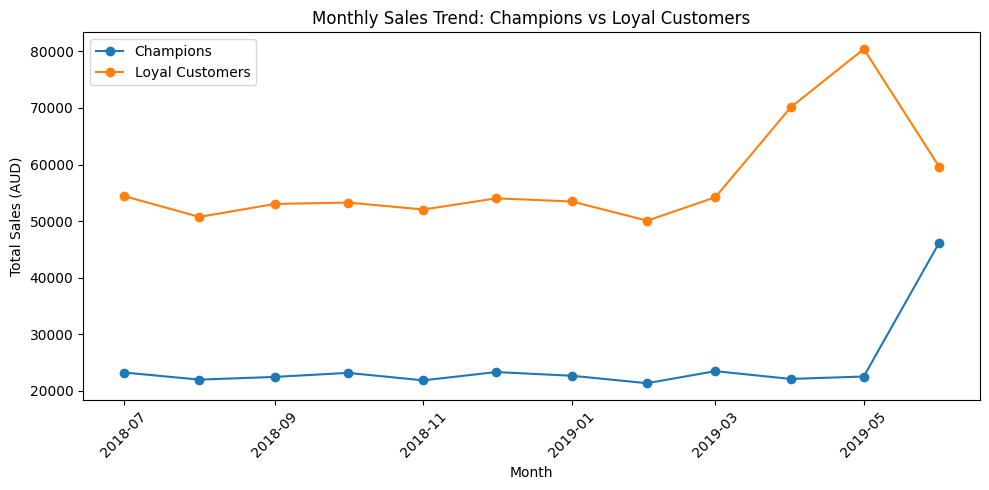

In [ ]:
# 1. Filter for Champions and Loyal Customers
key_segs = ['Champions', 'Loyal Customers']
df_key = df[df['Segment'].isin(key_segs)].copy()

# Merge df_key with rfm to get Recency and Frequency
df_key = df_key.merge(rfm[['Recency', 'Frequency']], left_on='LYLTY_CARD_NBR', right_index=True, how='left')

# 2. Summary RFM & basket metrics by segment
behavior_summary = df_key.groupby('Segment').agg(
    Avg_Recency=('Recency', 'mean'),
    Avg_Frequency=('Frequency', 'mean'),
    Avg_Monetary=('TOT_SALES', 'mean'),
    Avg_Units_Sold=('PROD_QTY', 'mean'),
    Avg_Basket_Value=('TOT_SALES', 'mean')
).round(2)
print("Behavior Summary (RFM & Basket):")
display(behavior_summary)

# 3. Pack‐size distribution
df_key['Weight_g'] = df_key['PACKAGE_SIZE'].str.rstrip('gG').astype(int)
df_key['Size_Bin'] = pd.cut(
    df_key['Weight_g'],
    bins=[0, 90, 170, 250, df_key['Weight_g'].max()+1],
    labels=['≤90g','91–170g','171–250g','>250g']
)
pack_dist = pd.crosstab(df_key['Segment'], df_key['Size_Bin'], normalize='index').mul(100).round(1)
print("\nPack‐Size Distribution (%) by Segment:")
display(pack_dist)

# 4. Top 5 SKUs by revenue for each segment
top_skus = (
    df_key.groupby(['Segment','PROD_NAME'])['TOT_SALES']
          .sum()
          .reset_index()
          .sort_values(['Segment','TOT_SALES'], ascending=[True, False])
          .groupby('Segment')
          .head(5)
)
print("\nTop 5 SKUs by Revenue:")
print(top_skus)

# 5. Monthly sales trend visualization
df_key['Year_Month'] = df_key['DATE'].dt.to_period('M')
trend = df_key.groupby(['Year_Month','Segment'])['TOT_SALES'].sum().unstack('Segment')

plt.figure(figsize=(10, 5))
for seg in key_segs:
    plt.plot(trend.index.to_timestamp(), trend[seg], marker='o', label=seg)
plt.title("Monthly Sales Trend: Champions vs Loyal Customers")
plt.xlabel("Month")
plt.ylabel("Total Sales (AUD)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Behavior Summary (RFM & Basket):


,Avg_Recency,Avg_Frequency,Avg_Monetary,Avg_Units_Sold,Avg_Basket_Value
Segment,,,,,
Big Spenders,123.55,5.71,7.58,1.97,7.58
Potential Loyalists,39.98,2.12,6.39,1.70,6.39



Pack‐Size Distribution (%) by Segment:


Size_Bin,≤90g,91–170g,171–250g,>250g
Segment,,,,
Big Spenders,1.2,53.6,34.8,10.4
Potential Loyalists,1.1,55.1,35.0,8.7



Top 5 SKUs by Revenue:


,Segment,PROD_NAME,TOT_SALES
11,Big Spenders,Dorito Corn Chp Supreme 380g,6844.5
30,Big Spenders,Kettle Mozzarella Basil & Pesto 175g,5999.4
80,Big Spenders,Smiths Crnkle Chip Orgnl Big Bag 380g,5982.6
6,Big Spenders,Cheezels Cheese 330g,5814.0
29,Big Spenders,Kettle Honey Soy Chicken 175g,5772.6
138,Potential Loyalists,Kettle Sea Salt And Vinegar 175g,2133.0
185,Potential Loyalists,Smiths Crinkle Original 330g,2029.2
112,Potential Loyalists,Cheezels Cheese 330g,1949.4
140,Potential Loyalists,Kettle Sensations Camembert & Fig 150g,1863.0
135,Potential Loyalists,Kettle Honey Soy Chicken 175g,1857.6


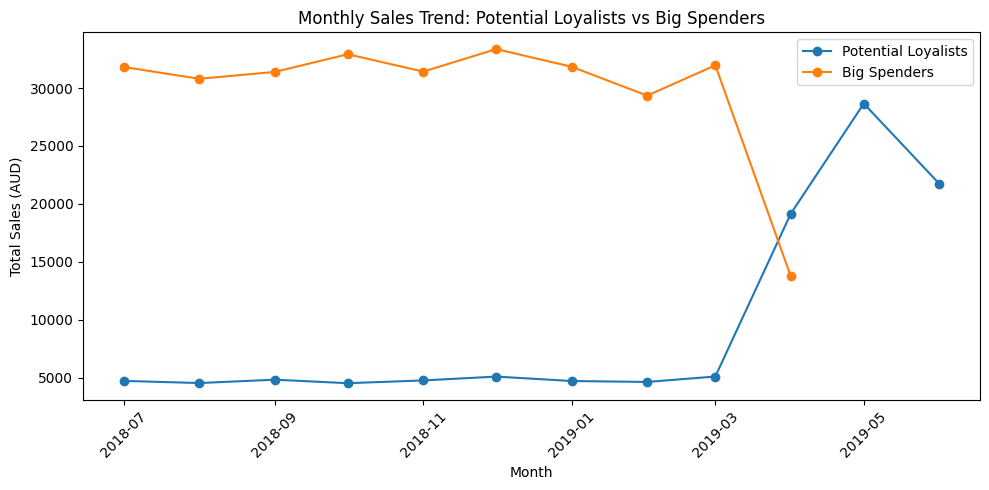

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Filter for the two key segments: Potential Loyalists & Big Spenders
key_segs = ['Potential Loyalists', 'Big Spenders']
df_plbs = df[df['Segment'].isin(key_segs)].copy()

# Merge df_plbs with rfm to get Recency and Frequency
df_plbs = df_plbs.merge(
    rfm[['Recency', 'Frequency']],
    left_on='LYLTY_CARD_NBR',
    right_index=True,
    how='left'
)

# 2. Summary RFM & basket metrics by segment
behavior_summary = df_plbs.groupby('Segment').agg(
    Avg_Recency      = ('Recency', 'mean'),
    Avg_Frequency    = ('Frequency', 'mean'),
    Avg_Monetary     = ('TOT_SALES', 'mean'),
    Avg_Units_Sold   = ('PROD_QTY', 'mean'),
    Avg_Basket_Value = ('TOT_SALES', 'mean')
).round(2)
print("Behavior Summary (RFM & Basket):")
display(behavior_summary)

# 3. Pack‐size distribution
df_plbs['Weight_g'] = df_plbs['PACKAGE_SIZE'].str.rstrip('gG').astype(int)
df_plbs['Size_Bin'] = pd.cut(
    df_plbs['Weight_g'],
    bins=[0, 90, 170, 250, df_plbs['Weight_g'].max() + 1],
    labels=['≤90g', '91–170g', '171–250g', '>250g']
)
pack_dist = pd.crosstab(
    df_plbs['Segment'],
    df_plbs['Size_Bin'],
    normalize='index'
).mul(100).round(1)
print("\nPack‐Size Distribution (%) by Segment:")
display(pack_dist)

# 4. Top 5 SKUs by revenue for each segment
top_skus = (
    df_plbs.groupby(['Segment', 'PROD_NAME'])['TOT_SALES']
      .sum()
      .reset_index()
      .sort_values(['Segment', 'TOT_SALES'], ascending=[True, False])
      .groupby('Segment')
      .head(5)
)
print("\nTop 5 SKUs by Revenue:")
display(top_skus)

# 5. Monthly sales trend visualization
df_plbs['Year_Month'] = df_plbs['DATE'].dt.to_period('M')
trend = df_plbs.groupby(['Year_Month', 'Segment'])['TOT_SALES'].sum().unstack('Segment')

plt.figure(figsize=(10, 5))
for seg in key_segs:
    plt.plot(
        trend.index.to_timestamp(),
        trend[seg],
        marker='o',
        label=seg
    )
plt.title("Monthly Sales Trend: Potential Loyalists vs Big Spenders")
plt.xlabel("Month")
plt.ylabel("Total Sales (AUD)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# 1. Filter for the two segments
key_segs = ['Potential Loyalists', 'Big Spenders']
df_plbs = df[df['Segment'].isin(key_segs)].copy()

# 2. LIFESTAGE distribution (%)
lifestage_ct_plbs = (
    pd.crosstab(df_plbs['Segment'], df_plbs['LIFESTAGE'], normalize='index')
      .mul(100)
      .round(1)
)

# 3. PREMIUM_CUSTOMER distribution (%)
premium_ct_plbs = (
    pd.crosstab(df_plbs['Segment'], df_plbs['PREMIUM_CUSTOMER'], normalize='index')
      .mul(100)
      .round(1)
)

# 4. Display
print("LIFESTAGE % for Potential Loyalists & Big Spenders:\n")
display(lifestage_ct_plbs)

print("\nPremium Customer % for Potential Loyalists & Big Spenders:\n")
display(premium_ct_plbs)


LIFESTAGE % for Potential Loyalists & Big Spenders:



LIFESTAGE,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES
Segment,,,,,,,
Big Spenders,9.8,2.4,17.1,25.2,22.3,14.4,8.9
Potential Loyalists,10.4,4.5,10.6,18.1,19.6,9.8,27.0



Premium Customer % for Potential Loyalists & Big Spenders:



PREMIUM_CUSTOMER,Budget,Mainstream,Premium
Segment,,,
Big Spenders,34.4,38.4,27.2
Potential Loyalists,32.9,41.0,26.1


Behavior Summary (At Risk & Hibernating):


,Avg_Recency,Avg_Frequency,Avg_Monetary,Avg_Units_Sold,Avg_Basket_Value
Segment,,,,,
At Risk,152.38,2.93,8.73,1.99,8.73
Hibernating,191.78,1.69,6.50,1.69,6.50



Pack‐Size Distribution (%) by Segment:


Size_Bin,≤90g,91–170g,171–250g,>250g
Segment,,,,
At Risk,0.2,52.0,30.7,17.2
Hibernating,1.3,54.7,34.7,9.3



Top 5 SKUs by Revenue:


,Segment,PROD_NAME,TOT_SALES
11,At Risk,Dorito Corn Chp Supreme 380g,3857.75
80,At Risk,Smiths Crnkle Chip Orgnl Big Bag 380g,2655.00
12,At Risk,Doritos Cheese Supreme 330g,2456.70
30,At Risk,Kettle Mozzarella Basil & Pesto 175g,2424.60
79,At Risk,Smiths Crinkle Original 330g,2365.50
185,Hibernating,Smiths Crinkle Original 330g,4354.80
176,Hibernating,Smiths Crinkle Chips Salt & Vinegar 330g,4189.50
145,Hibernating,Kettle Tortilla ChpsHny&Jlpno Chili 150g,4126.20
142,Hibernating,Kettle Sweet Chilli And Sour Cream 175g,4104.00
136,Hibernating,Kettle Mozzarella Basil & Pesto 175g,4050.00


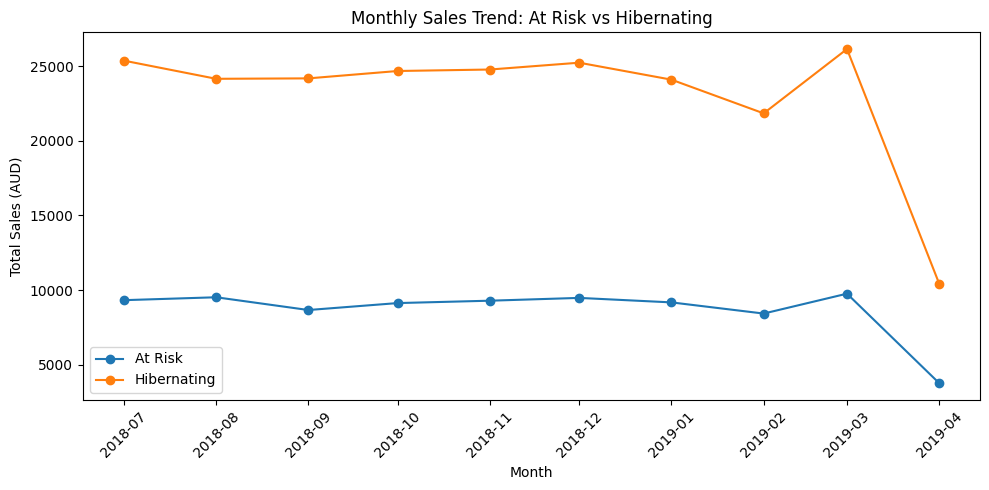

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Filter for At Risk & Hibernating
key_segs = ['At Risk', 'Hibernating']
df_lost = df[df['Segment'].isin(key_segs)].copy()

# Merge to pull in RFM
df_lost = df_lost.merge(
    rfm[['Recency', 'Frequency']],
    left_on='LYLTY_CARD_NBR',
    right_index=True,
    how='left'
)

# 2. RFM & basket summary
behavior_summary_lost = df_lost.groupby('Segment').agg(
    Avg_Recency      = ('Recency', 'mean'),
    Avg_Frequency    = ('Frequency', 'mean'),
    Avg_Monetary     = ('TOT_SALES', 'mean'),
    Avg_Units_Sold   = ('PROD_QTY', 'mean'),
    Avg_Basket_Value = ('TOT_SALES', 'mean')
).round(2)
print("Behavior Summary (At Risk & Hibernating):")
display(behavior_summary_lost)

# 3. Pack‐size distribution
df_lost['Weight_g'] = df_lost['PACKAGE_SIZE'].str.rstrip('gG').astype(int)
df_lost['Size_Bin'] = pd.cut(
    df_lost['Weight_g'],
    bins=[0, 90, 170, 250, df_lost['Weight_g'].max()+1],
    labels=['≤90g','91–170g','171–250g','>250g']
)
pack_dist_lost = pd.crosstab(
    df_lost['Segment'],
    df_lost['Size_Bin'],
    normalize='index'
).mul(100).round(1)
print("\nPack‐Size Distribution (%) by Segment:")
display(pack_dist_lost)

# 4. Top 5 SKUs by revenue
top_skus_lost = (
    df_lost.groupby(['Segment','PROD_NAME'])['TOT_SALES']
           .sum()
           .reset_index()
           .sort_values(['Segment','TOT_SALES'], ascending=[True, False])
           .groupby('Segment')
           .head(5)
)
print("\nTop 5 SKUs by Revenue:")
display(top_skus_lost)

# 5. Monthly trend
df_lost['Year_Month'] = df_lost['DATE'].dt.to_period('M')
trend_lost = df_lost.groupby(['Year_Month','Segment'])['TOT_SALES'].sum().unstack('Segment')

plt.figure(figsize=(10,5))
for seg in key_segs:
    plt.plot(
        trend_lost.index.to_timestamp(),
        trend_lost[seg],
        marker='o',
        label=seg
    )
plt.title("Monthly Sales Trend: At Risk vs Hibernating")
plt.xlabel("Month")
plt.ylabel("Total Sales (AUD)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
